# Week X - Basics of Machine Learning (ML)

## Outline:
- [Preliminaries](#preliminaries): Recommended books
- [Section One](#section-1): Types of Machine Learning
- [Section Two](#section-2): Challenges in ML
- [Section Three](#section-3): Simple Regression Algorithms

**Keywords:** Supervised Learning, Unsupervised Learning, Semisupervised Learning, Reinforcement Learning, Classification, Regression, Instanced-Based Learning, Model-Based Learning, Hyperparameters, Training Data, Systematic Bias, Underfitting, Overfitting, k-Nearest Neighbours (kNN) Regression, Gradient Descent, Cost Function.

<a name="preliminaries"></a>

## Preliminaries: Recommended Books [^](#outline)

There are three books that I would recommend:

1) [The One Hundred-Page Machine Learning Book](http://themlbook.com/) by 
Andriy Burkov. 
- This is the best conceptual book on ML that I have read. It also does a reasonable jobs of the maths. This book is free to try before you buy (a great idea).

**then two O'REILLY books:**

2) [Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. 
- This is the best hands-on book that I have read and has sufficient detail to take you into the understanding of the algorithms. This book also has a good collection of the original papers cited and links to them on their website. There is also much information on the [github](https://homl.info). If you only buy one then this one covers the most. **If there was a textbook for this course, this would be it.**

3) [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/). This is a more introductory level than one above, however it is really well written and takes you through things more carefully and I find is very good. I tend to use the two as complementary.

There are plenty of other good more theoretical ML books but the above are practical, but still having enough theory for you to understand them. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you further.

**Note:** I will take examples from the last two of these books (on publically available data) and will reference them appropriately. For **2.** I will write {homl} and for **3.** I will write {imlp}. 
* When "#not shown" is written this means in either of these two books. 

<a name="section-1"></a>

## Section One: Types of Machine Learning [^](#outline)

In machine learning you build a model from the data that you have. There are many different sorts of machine learning and there are many different ways of categorising them.

### Supervised, Unsupervised and Reinforcement Learning

**Supervised learning** builds a model using data with a **desired output** (called labels) where we want to predict the outcome for new observations of the input. Most of the machine learning that we carry out in the physical sciences (and the world at large) is supervised. The historical data is called **training data** and is used to train the model. 
* **Examples** are: sorting emails to know which ones are spam (classification), autocorrect, predictive analytics, object detection, such as facial recognition, predicting the price of a car (regression) etc. 

**Unsupervised learning** is where you **don't have a desired output**, aka where the training data is unlabeled, so you are trying to build a model based on other properties. We find patterns based on similarities or differences of data points. Some common examples are trying to gain intuition of high-dimensional data, social network friend suggestions via the frequency of connections between friends etc.
* Examples are: **clustering** the data into categories without us knowing the two categories or how the input data relates to one another. 

**Semisupervised learning** is also a form, which is somehwere between the two where you have algorithms that cope with partially labelled data.

**Reinforcemnt learning** is somewhat different in that it has **agents** that **perform a (sometimes complex) series of tasks** and learn to do the tasks well through a series of **trial and error**. If you have ever played a game against a ML based computer then is almost certainly how it was trained.

<div style="background-color: #FFF8C6">

### Mathematical Description of Supervised Vs. Unsupervised

Inputs belong to an input space $x^{(i)} \in X$. For example, if you have $p$ *different* continous features for each data point then $x^{(i)} \in \mathbb{R}^{p}$. In the case where $p>1$, we call our data *multivariate*. **Note:** the input space could contain some other data that are not numerical e.g. gender, name, etc. 

If you are dealing with **supervised learning** then there will be outputs in an output space $y^{(i)} \in Y$, which can be continous or categorical: which is a number or some feature/group. For a given task we are trying to find a function $f:X \rightarrow Y$, so that $f(x)$ is a "good" **predictor** for $y^{(i)}$. The definition of good will depend on the algorithm used.  For **unsupervised learning** there is no outcome variable, we want to predict. 

We are trying to link the **predictors** to the **outcomes** to make new predictions on a new data-set.

### Classification and Regression

The two main uses of ML in the physical sciences are classification and regression in supervised ML. 

In **classification** you are trying to **distinguish between types of entities**. For example pictures of cats from dogs, spam emails,  clothes types, the energy deposits left by electron versus muons in a detector etc. Classification problems are often binary $y\in{0,1}$, however there are generalisations to multiple-class cases. 

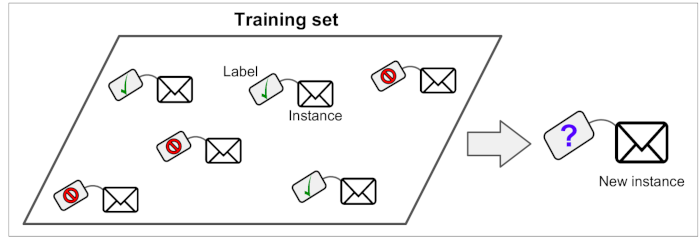
*(Source {homl} 1-5) A labeled training set for supervised learning, spam classification. Many example emails and class (Spam or not) are used to train the ML algorithm, and it is then used to classify new emails.*

In **regression** you are trying to predict **what a value will be**. For example the return on an investment, energy of a cosmic ray based on observation of scintillation light and the muons that it produced etc. Simply, classification tells you what it is whereas regression tells you what value it has.

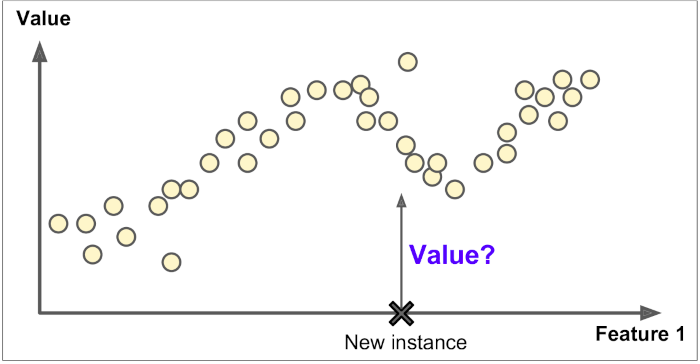

**Note:** While these sound conceptually different the same approaches can often be used for both as you will.

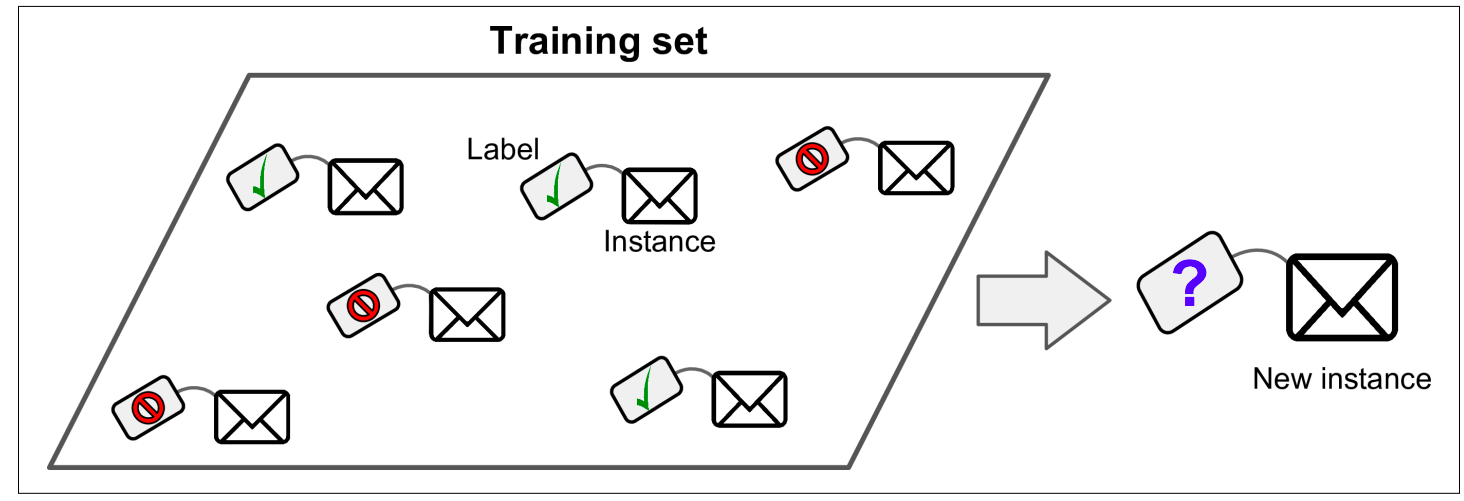

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "/home/kj4718/Pictures/"
Image(filename = PATH + "homl_classification.png", width=100, height=100)

### Instance-based and Model-based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data. 

In **instance-based learning** you simply look at the data that you have and in some way say that it is (either in classification or regression) **the same as the "nearest" (calculated in some way) data that you already have** to it. Common examples of these algorithms are k-Nearest Neighbours (discussed below), kernal machines, etc.

In **model-based learning** you take a few instances and build a **more general model**. This model is **refined** through **training and validation**. Model-based ML models often have **internal parameters that are not seen** in the outside world -- these are called **hyperparameters**.

<a name="section-2"></a>

## Section Two: Challenges in ML [^](#outline)

This part is a paraphrase of what is said the same section of {homl}, I even pinch their example. They say it much more eloquently but mine is more succinct.

### -Insuficient Training Data

**Training data** is the dataset we use for our ML model to learn. Often data-sets of **thousands of events** are required to build a reasonable model. There are various methods to **lower the amount of data you need**, for example by making your **datasets as simple as possible** -- but **not enough data** results in **poor ML** model.

### -Unrepresentative (Biased) Training Data

If there is a **systematic bias** in your training data then your model will **not generalise well** and will **produce wrong results**. A systematic bias is a result of how the data is collected, examples being the zero error, background noise, poor thermal contact between the thermometer and the substance whose temperature is to be found, solar radiation because trees or buildings shade the radiometer, etc. Some form of **regularisation** can be used to mitigate this to some extent (see below in section threee).

### -Poor Quality Data

If your data is **noisy** with a lot of **errors and outliers**, then your model is going to be unreliable. 

There may be **missing fields** (e.g. one of your instruments is not working that day), at which point you need to decide what to do about the **missing data**. There are a variety of approaches, but two common ones are to **set the missing fields**  to the **median value** so that it should have **very little influence** or do the opposite and to set it to a **value far outside the normal range** so that the **model learns not to use it**. There are pros and cons to both.

### -Irrelevant Features

If there is a lot of **irrelevant data** it can sometimes **swamp the model** and mean that the **relevant information fields are lost**. An important part of ML is coming up with **appropriate** and **good set of features**; sometimes called *feature engineering*. This can involve selecting only the most **important data features** or **combining features** into new, more appropriate features. For example if you have a feature that is only a function of $r$, where $r=\sqrt{x^2+y^2}$ it is better to use $r$ than $x$ and $y$ separately.

### -Overfitting the Training Data

This is when your **model is more complex** than the data you have can easily train. An example taken straight from {homl} is the figure below:
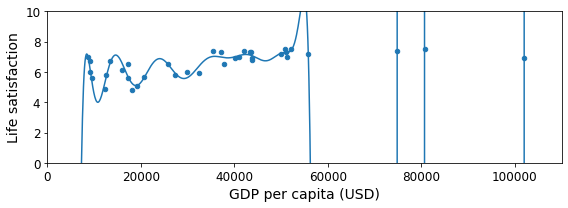

We came across something similar with minuit. In general you should **keep your model as simple as possible** to fit the data well.

### -Underfitting

This is the opposite of overfitting and is when your model is too simple to fit the data that you have. For example if you are trying to fit your data with a linear model but really the data form a parabolic distribution.

### Resolution: Testing and Validating

The only way to know if your model has generalised well is to **validate it on data**. The normal way to do this is to separate your data into **training data** and **testing data**. You use the **training data** to **train your model** and the **testing data** to test **how well it has generalised**. If there is a **large difference in the performance of the model** on the training data compared to the performance on the testing data it shows that your **model has been overtrained** and is **picking out features that are specific to your training data**. 

**Note:** *What fraction of your data should you use to train and what fraction to test?* There is no single answer to this question, but in most cases it tupically around 70:30 or 80:20 training:testing.  N

<a name="section-3"></a>

## Section Three: Simple Regression Algorithms [^](#outline)

Remeber that regression is trying to predict the value of some quantity by looking at a data set of similar data. 
* **Note:** this is different from the fitting that your were performing with iminuit last week. There you had an implicit assumption that there is an underlying truth that the data would follow in the absence of noise and statistical effects, here all that is assumed is that these data vary in a similar way. 

Lets set up a data set:

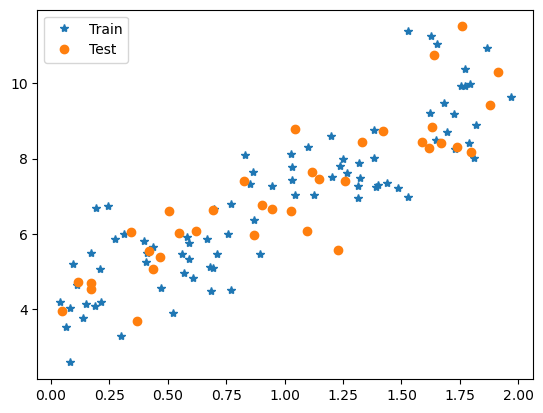

In [4]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pylab as pl

x = 2*np.random.rand(120, 1) # np.random.rand prodcues an 120x1 array of numbers from a uniform distribution
y = 4 + 3*x + np.random.randn(120, 1) # np.random.rand prodcues an 120x1 array of numbers from a normal distribution
#z = x*x + y*np.random.randn(120,2) What is this here for?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # Note that sklearn can split your data into samples for you.

pl.plot(x_train,y_train,"*", label='Train')
pl.plot(x_test,y_test,"o", label='Test')
pl.legend()
pl.show()

# looks a reasonable mix

We have plotted is $y=(3x+4)+\epsilon$, where $\epsilon$ is a random number on the interval $[0,1)$ (where the square bracket denotes a closed equality and the curly bracket an open interval). We have essentially added noise to what would otherwise be a perfect straight line.

Proceeding we will set up a really simple regression algorithm and see what it would predict -- with different algorithm parameters. We will start off with the **k-nearest neighbours (kNN) regression algorithm**. Look up the algorithm online, it is used a lot more than you might think in the real world so it worth understanding it. (Examples/Resources here or expand)

the error is 0.9194367497408347


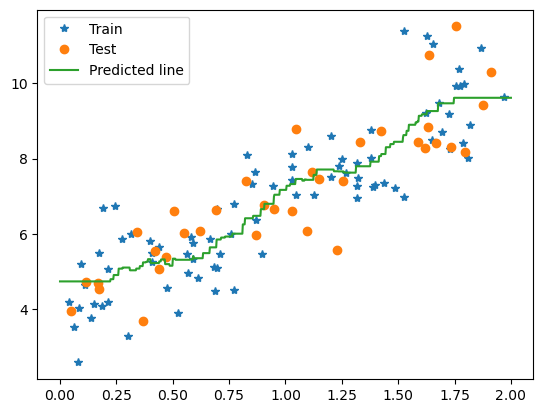

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

#Pick values for k-nearest neighbors and weighting.
k = 18 # number of NN taken into account.

#weights="distance" # how are the weighted (NOT SURE WHAT THIS MEANS)
weights = "uniform"
weight = "distance"
model = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
model.fit(x_train, y_train)

#First lets see what line would be predicted from the training data 
xl = np.linspace(0, 2, 1000).reshape(-1, 1)
pl.plot(x_train, y_train, "*", label='Train')
pl.plot(x_test, y_test, "o", label='Test')
pl.plot(xl, model.predict(xl), label='Predicted line')
pl.legend()

#Calculate the 'root mean squared' (RMS) error for testing data
pred = model.predict(x_test) #Make prediction on test set
error = np.sqrt(mean_squared_error(y_test, pred)) #calculate RMSe

print("the error is", error)
pl.show()


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=3) # so this has 3 folds

array([0.69342529, 0.68885612, 0.76358955])

## Exercise One

**kNN** is very useful if you just want a **general parametisation** and are **not making assumptions about the linearity** or otherwise of the fit.

- Turn the program above into a loop and investigate how well this algorithm does as a function of NN and weighting. Try changing the number of points may be from 120 to 1200 and see how things change.

### Linear Models

Now, the simple **least squares linear model can be solved analytically** (as it is of closed form). {homl} shows explicitly how to do that, however here we will just treat like another algorithm. Also this is **no longer the case when the number of entry points becomes very large** as it becomes **too computationally intensive**. The different **gradient descent** methods are needed.

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
m = round(lin_reg.coef_[0,0], 2)
c = round(lin_reg.intercept_[0], 2)
print("The line of best fit is: y={m}x+{c}".format(c=c,m=m))

The line of best fit is: y=3.08x+3.92


the error is 0.8811580569188602


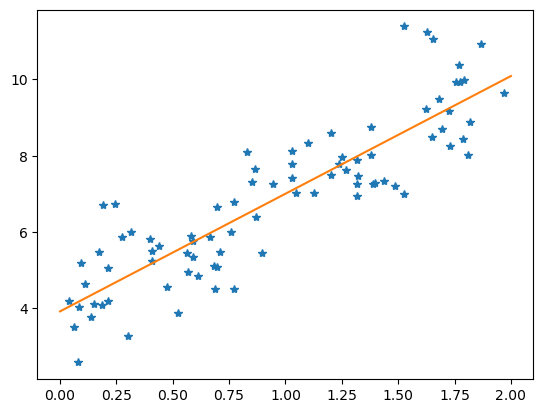

In [9]:
pl.plot(x_train, y_train, "*")
pl.plot(xl, lin_reg.predict(xl))
pred=lin_reg.predict(x_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test, pred)) #calculate RMSe

print("the error is", error)
pl.show()

If we look visually on the graph, we can see that the error is $\approx\pm1$, so this seems to be a sensible error. Also, as we are adding a random number $[0,1)$, it also makes sense that this would be less than 1.

### Polynomial regression

This is an example taken from {homl} however, like so much in that book I think that it is clearly explained (although my explanation is shorter).

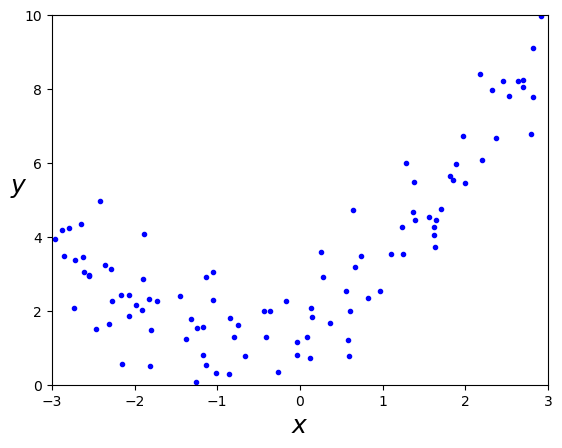

In [10]:
#generate some data
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

Now in reality I would probably not try to perform linear regression on this but would use another form of regression. Remember we are only trying to predict the values **NOT** trying to fit for an underlying physical model. However, this does provide some useful clues as to how to do things.

**Note:** Here we have used sklearn.preprocessing to add additional features (in this case the squares of the numbers). The preprocessing functions in sklearn are really useful and powerful. Sadly, we don't have time to go through them here, but you should know that they exist. The description for this one can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Take time to look through them and familiarise your self with them.

With this extra feature you can perform linear regression on the expanded data set:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) #Explain what this is doing and what the result means 
print(X_poly[1], X[1]) #Maybe showing the output of the fit to the point that was originally fed in with one specific point?

[2.70428584 7.3131619 ] [2.70428584]


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_) # note that coeff now has 2 components as it is now a plane

[1.78134581] [[0.93366893 0.56456263]]


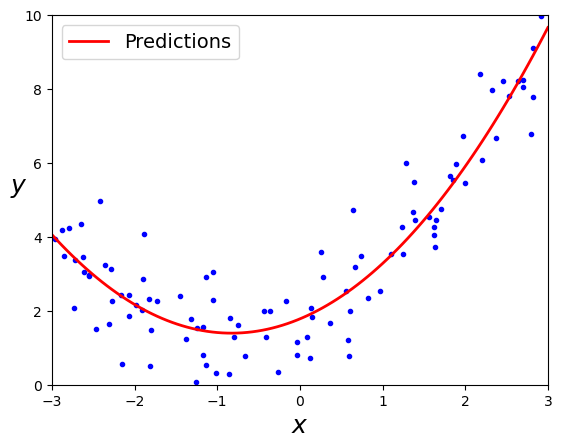

In [14]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

Now we add more polynomial features:


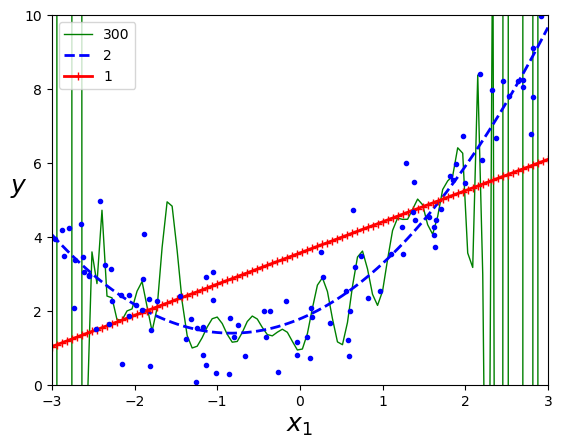

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

**The code below shows how you can tell that there is overfitting going on - I will discuss these with you when we get to this stage.**

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

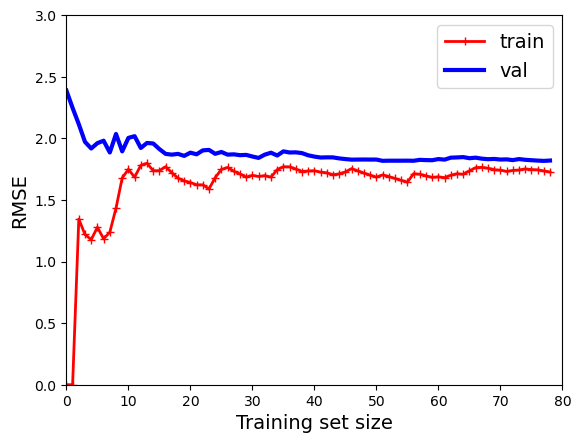

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown

plt.show()                                      # not shown

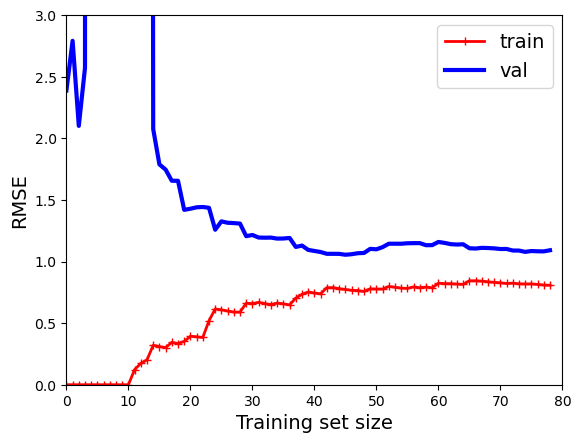

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()                        # not shown

### Regularisation

In **regularised regression** you apply a **cost function** that stops your overfitting going out of control (or at least helps to constrain it). We don't have time to cover this in detail but you should be familiar with the names so that you know what to look up if you need them (I very rarely have). Common forms are:

* Ridge Regularisation

* Lasso Regularisation

* Elastic Net (somewhere between the two)


## Exercise Two

* Investigate the student data from last week using different forms of regression. First see how G3 varies with G1 and G2 and then how it works with a combined G1 & G2.
* The example [here](https://datatofish.com/multiple-linear-regression-python/) might be useful. I must confess that I haven't actually run this example but it looks similar to what I am looking for at quick glance.